In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset("mpg")

In [3]:
# Display basic information about the dataset
print("### Dataset Overview ###")
df = df.dropna()
df.head()

### Dataset Overview ###


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### About the MPG Dataset
The `mpg` dataset contains information about fuel consumption and car attributes for different models.

For more details, visit the official [Seaborn documentation](https://github.com/mwaskom/seaborn-data) or check the dataset description on [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/auto+mpg).


In [4]:
# Select only numerical columns for PCA
numerical_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [5]:
# Standardization: Scale the data to have mean=0 and variance=1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])


In [6]:
# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

In [48]:
print(f"The number of principal components selected is {pca.n_components_}")

The number of principal components selected is 7


In [33]:
singular_values = pca.singular_values_
print(f"The singular values (importance of each component) are: {singular_values}")

The singular values (importance of each component) are: [44.31894903 18.42041876 16.89764357  8.49086079  6.91311788  4.6118117
  3.71938815]


In [35]:
cov_matrix = pca.get_covariance()
print(f"The covariance matrix (relationship between features after PCA) is:\n{cov_matrix}")

The covariance matrix (relationship between features after PCA) is:
[[ 1.00255754 -0.7796063  -0.80718609 -0.78041765 -0.83437272  0.42441122
   0.58202573]
 [-0.7796063   1.00255754  0.95325507  0.84513932  0.89982281 -0.50597413
  -0.34653145]
 [-0.80718609  0.95325507  1.00255754  0.89955178  0.93538058 -0.54519129
  -0.37080113]
 [-0.78041765  0.84513932  0.89955178  1.00255754  0.86674883 -0.69095816
  -0.41742634]
 [-0.83437272  0.89982281  0.93538058  0.86674883  1.00255754 -0.41790529
  -0.30991047]
 [ 0.42441122 -0.50597413 -0.54519129 -0.69095816 -0.41790529  1.00255754
   0.29105861]
 [ 0.58202573 -0.34653145 -0.37080113 -0.41742634 -0.30991047  0.29105861
   1.00255754]]


In [36]:
feature_names = pca.get_feature_names_out(numerical_cols)
print(f"The feature names in the transformed space are: {feature_names}")

The feature names in the transformed space are: ['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6']


In [47]:
print("PCA Model Parameters:")
for param, value in pca.get_params().items():
    print(f"  {param}: {value}")

PCA Model Parameters:
  copy: True
  iterated_power: auto
  n_components: None
  n_oversamples: 10
  power_iteration_normalizer: auto
  random_state: None
  svd_solver: auto
  tol: 0.0
  whiten: False


In [38]:
# Convert PCA results into a DataFrame
num_components = min(len(numerical_cols), len(df))
pca_df = pd.DataFrame(principal_components[:, :num_components], index=df.index, columns=[f"PC{i+1}" for i in range(num_components)])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.635049,-0.929039,-0.534679,0.745590,-0.546008,0.094974,-0.122078
1,3.493800,-0.805473,-0.649495,0.494829,-0.035636,-0.207134,0.097861
2,2.970415,-0.881186,-0.958742,0.719725,-0.286908,-0.136587,-0.059750
3,2.910197,-0.961721,-0.582953,0.531489,-0.283952,-0.293239,-0.124521
4,2.903826,-0.952789,-1.054836,0.565102,-0.544802,0.001897,-0.170826


This table contains the transformed dataset after applying PCA, where each row represents a car, and each column corresponds to a principal component. These new features (PC1, PC2, etc.) are uncorrelated and represent the most important patterns in the data.


In [39]:
# Explained variance (Inertia)
explained_variance = pca.explained_variance_ratio_
cum_variance = np.cumsum(explained_variance)

In [40]:
# Display Explained Variance
variance_df = pd.DataFrame({'Principal Component': [f"PC{i+1}" for i in range(num_components)],
                            'Explained Variance': explained_variance[:num_components]})
variance_df.head()

,Principal Component,Explained Variance
0,PC1,0.715805
1,PC2,0.123656
2,PC3,0.104056
3,PC4,0.026274
4,PC5,0.017417


This table quantifies how much variance each principal component captures. The first principal component (PC1) explains the most variance, followed by PC2, PC3, and so on. The higher the explained variance, the more important that component is in summarizing the dataset.


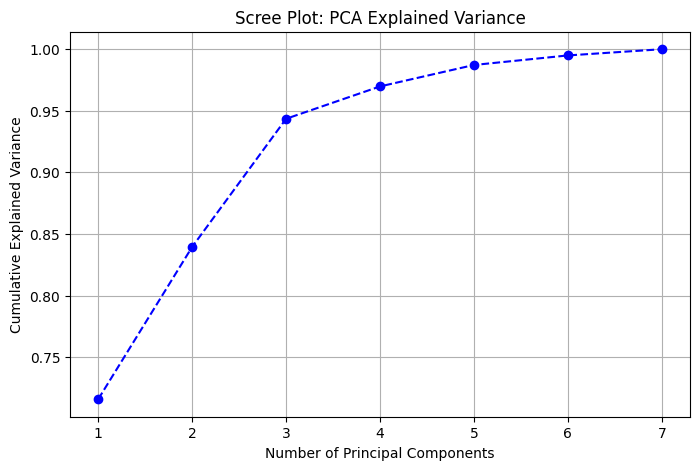

In [41]:
# Scree Plot (Explained Variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), cum_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: PCA Explained Variance')
plt.grid()
plt.show()

The scree plot shows the cumulative explained variance as we increase the number of principal components. This helps determine the optimal number of components to retain by identifying the "optimal point," where additional components contribute less to the overall variance.


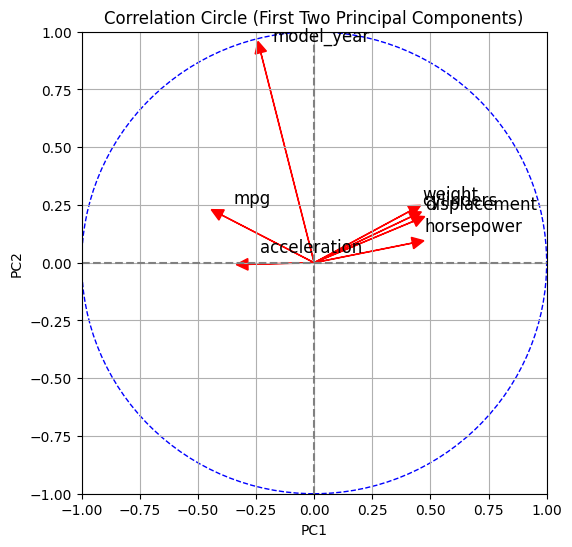

In [42]:
# Correlation Circle (Loadings Plot)
fig, ax = plt.subplots(figsize=(6,6))
num_features = len(numerical_cols)
for i, feature in enumerate(numerical_cols):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.05, color='r')
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, feature, fontsize=12)

# Add unit circle to the plot
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='dashed')
ax.add_patch(circle)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Correlation Circle (First Two Principal Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

This plot visualizes how the original features contribute to the first two principal components. Each arrow represents a feature, and its direction and length indicate how strongly it influences the components. Features pointing in the same direction are positively correlated, while those pointing in opposite directions are negatively correlated.


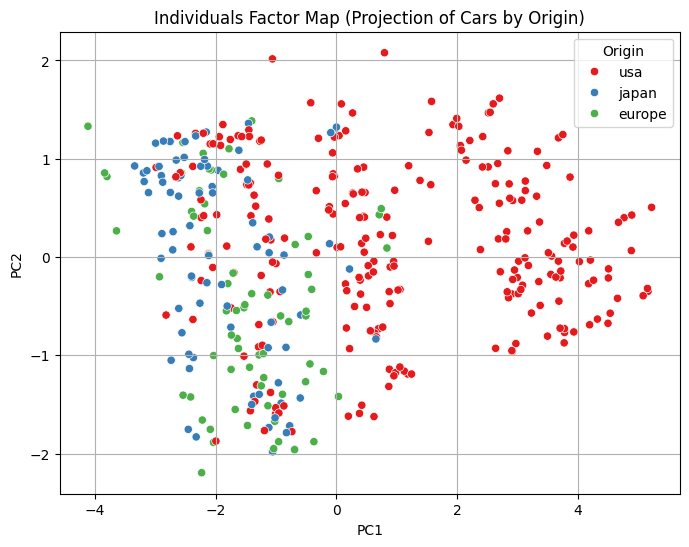

In [43]:
# Individuals Factor Map: Projection of Cars by Origin
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=df['origin'], palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Individuals Factor Map (Projection of Cars by Origin)')
plt.legend(title="Origin")
plt.grid()
plt.show()

This scatter plot shows the projection of cars in the first two principal components, colored by their origin (USA, Japan, Europe). It allows us to see how cars from different regions cluster based on shared characteristics, helping us understand regional design trends.


In [44]:
# Display Eigenvectors (Principal Axes)
eigenvectors_df = pd.DataFrame(pca.components_[:num_components], columns=numerical_cols, index=[f"PC{i+1}" for i in range(num_components)])
eigenvectors_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
PC1,-0.398135,0.416124,0.429283,0.422813,0.414046,-0.284897,-0.229510
PC2,0.206759,0.198541,0.180362,0.085242,0.224675,-0.006972,0.909675
PC3,-0.257215,0.139159,0.100316,-0.169684,0.276103,0.893308,-0.037246
PC4,0.750966,0.477306,0.297847,-0.042076,-0.107735,0.121124,-0.302435
PC5,0.340776,-0.493222,-0.056581,0.711289,0.265158,0.230755,-0.088961


This table shows the **eigenvectors**, where each row represents a principal component (PC1, PC2, etc.), and each column indicates how much each original feature contributes to that component. These eigenvectors define the new axes along which the data is projected in PCA.